Epoch 0 - Loss: 0.2631
Epoch 1000 - Loss: 0.2047
Epoch 2000 - Loss: 0.0425
Epoch 3000 - Loss: 0.0143
Epoch 4000 - Loss: 0.0078
Epoch 5000 - Loss: 0.0053
Epoch 6000 - Loss: 0.0039
Epoch 7000 - Loss: 0.0031
Epoch 8000 - Loss: 0.0025
Epoch 9000 - Loss: 0.0022


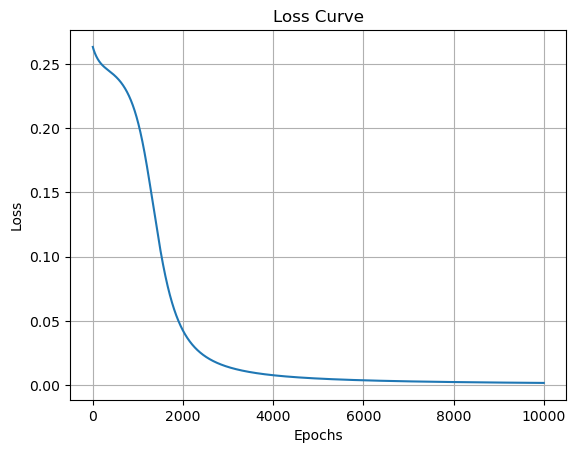


Testing model on input values:
0 XNOR 0: 1 (raw: 0.9564)
0 XNOR 1: 0 (raw: 0.0491)
1 XNOR 0: 0 (raw: 0.0409)
1 XNOR 1: 1 (raw: 0.9617)


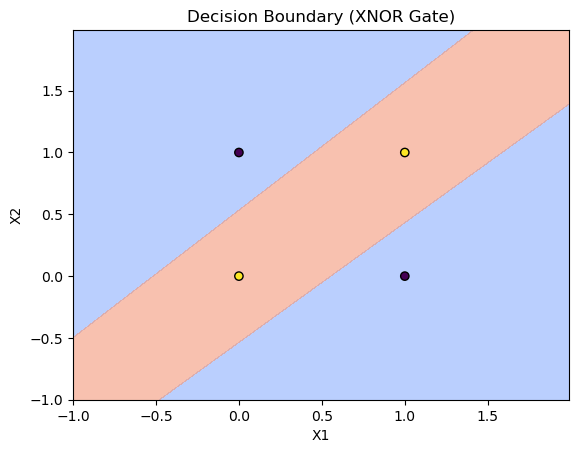

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

# Modified XOR gate (XNOR): 0,0→1; 0,1→0; 1,0→0; 1,1→1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[1], [0], [0], [1]])

# Parameters
np.random.seed(1)
input_size = 2
hidden_size = 2
output_size = 1
lr = 0.1
epochs = 10000

# Weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

losses = []

# Training
for epoch in range(epochs):
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)

    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)

    loss = np.mean((y - a2) ** 2)
    losses.append(loss)

    delta_output = (y - a2) * sigmoid_deriv(a2)
    delta_hidden = delta_output.dot(W2.T) * sigmoid_deriv(a1)

    W2 += a1.T.dot(delta_output) * lr
    b2 += np.sum(delta_output, axis=0, keepdims=True) * lr
    W1 += X.T.dot(delta_hidden) * lr
    b1 += np.sum(delta_hidden, axis=0, keepdims=True) * lr

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} - Loss: {loss:.4f}")

# Plot the loss curve
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Test loop like your format
print("\nTesting model on input values:")
test = [(0, 0), (0, 1), (1, 0), (1, 1)]

for x1, x2 in test:
    input_data = np.array([[x1, x2]])
    hidden = sigmoid(np.dot(input_data, W1) + b1)
    output = sigmoid(np.dot(hidden, W2) + b2)[0][0]
    print(f"{x1} XNOR {x2}: {round(output)} (raw: {output:.4f})")

# Plot decision boundary
def plot_decision_boundary():
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    hidden = sigmoid(np.dot(grid, W1) + b1)
    output = sigmoid(np.dot(hidden, W2) + b2)
    Z = output.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k')
    plt.title("Decision Boundary (XNOR Gate)")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

plot_decision_boundary()
